In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import statistics
from tqdm import tqdm

In [2]:
xg_df = pd.DataFrame(pd.read_pickle('dataset/intersection/statsbomb_matches_shots/shots_per_match.pkl')['shot_xgs'].sum())

In [3]:
xg_df.head()

,0
0,0.069410
1,0.018611
2,0.156310
3,0.087260
4,0.400913


In [4]:
def dp(p_is):
    n = len(p_is)
    p_k = [1] + [0]*n
    # Iterate over the dp table
    for i in range(n+1):
        for c in range(i, 0, -1):
            inc = p_is[i-1]*p_k[c-1]
            p_k[c-1] -= inc
            p_k[c] += inc
    return p_k

def simulation(p_is, n=1):
    amnts = [0]*(len(p_is)+1)
    for _ in range(n):
        goal_amnt = sum([int(random.random() < p_i) for p_i in p_is])
        amnts[goal_amnt] += 1
    return [amnt/n for amnt in amnts]

In [5]:
import scipy
shots = 40 # Number of shots to simulate
N = 10000 # Number of simulations
cosine_similarities = []
max_abs_diffs = []
jensen_shannon_divergences = []
p_is = xg_df.sample(shots, replace=True).values.flatten().tolist()
for i in tqdm(range(1, N+1)):
    exact_dist = np.array(dp(p_is))
    sim = np.array(simulation(p_is, i))
    cosine_similarities.append(scipy.spatial.distance.cosine(exact_dist, sim))
    max_abs_diffs.append(max(abs(exact_dist - sim)))
    jensen_shannon_divergences.append(scipy.spatial.distance.jensenshannon(exact_dist, sim))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [13:42<00:00, 12.15it/s]


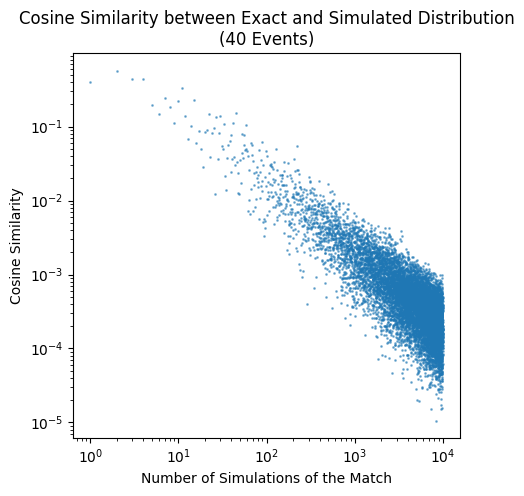

In [9]:
plt.figure(figsize=(5, 5))
plt.yscale('log')
plt.xscale('log')
plt.scatter(range(1, N+1), cosine_similarities, s=1, alpha=0.5)
plt.title('Cosine Similarity between Exact and Simulated Distribution\n(40 Events)')
plt.xlabel('Number of Simulations of the Match')
plt.ylabel('Cosine Similarity')
plt.show()

<Figure size 640x480 with 0 Axes>

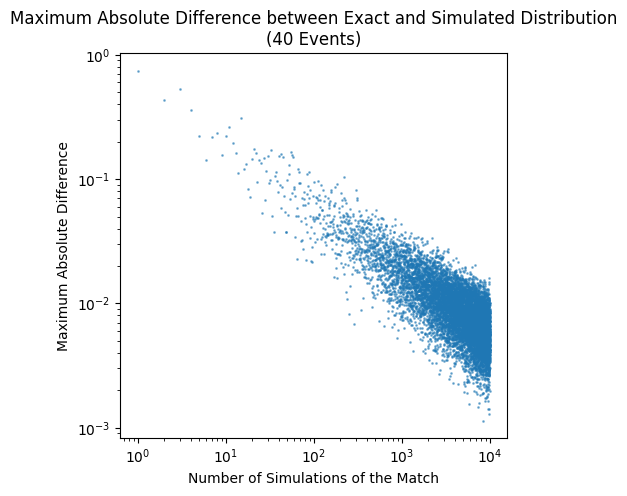

In [10]:
plt.clf()
plt.figure(figsize=(5, 5))
plt.yscale('log')
plt.xscale('log')
plt.scatter(range(1, N+1), max_abs_diffs, s=1, alpha=0.5)
plt.title('Maximum Absolute Difference between Exact and Simulated Distribution\n(40 Events)')
plt.xlabel('Number of Simulations of the Match')
plt.ylabel('Maximum Absolute Difference')
plt.show()

<Figure size 640x480 with 0 Axes>

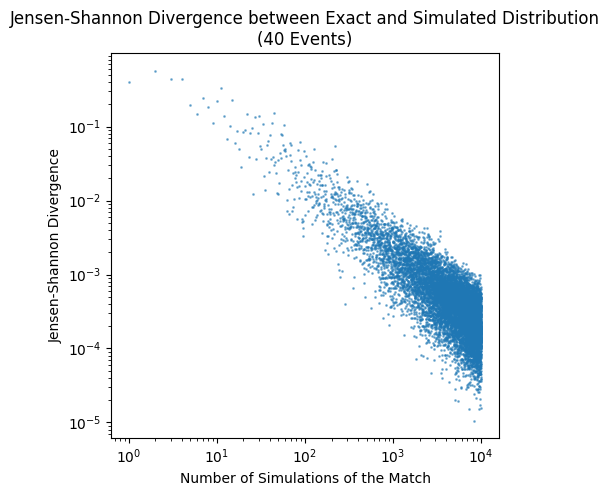

In [11]:
plt.clf()
plt.figure(figsize=(5, 5))
plt.yscale('log')
plt.xscale('log')
plt.scatter(range(1, N+1), cosine_similarities, s=1, alpha=0.5)
plt.title('Jensen-Shannon Divergence between Exact and Simulated Distribution\n(40 Events)')
plt.xlabel('Number of Simulations of the Match')
plt.ylabel('Jensen-Shannon Divergence')
plt.show()